In [1]:
import numpy as np
import pandas as pd
import string
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow
from sklearn.metrics import accuracy_score

C:\Users\Onurun\.conda\envs\PyOnur\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Onurun\.conda\envs\PyOnur\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Onurun\.conda\envs\PyOnur\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Onurun\.conda\envs\PyOnur\lib\site-packages\tensorflow\python\frame

In [49]:
data_train = pd.read_csv("../Data/sign_mnist_train.csv")

In [50]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [51]:
target_train_num = data_train['label'].values

In [52]:
target_train_num[0:25]

array([ 3,  6,  2,  2, 13, 16,  8, 22,  3,  3, 18, 10, 16, 22, 20, 16, 17,
       13, 13, 19, 18, 21, 16, 23,  3], dtype=int64)

In [53]:
np.unique(target_train_num)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

### Pictures available in data set
***Note that J (Nr.9) and Z (Nr.25) are missing in the pictures and also above in the target data.***
<br>
Pictures are ordered from left to right, from top to bottom.

![Data_Pictures](../Pictures/amer_sign2.png)

In [54]:
target_train = []
for i in target_train_num:
    target_train.append(string.ascii_uppercase[i])    

In [55]:
target_train = np.array(target_train)

In [56]:
target_train[0:25], np.unique(target_train)

(array(['D', 'G', 'C', 'C', 'N', 'Q', 'I', 'W', 'D', 'D', 'S', 'K', 'Q',
        'W', 'U', 'Q', 'R', 'N', 'N', 'T', 'S', 'V', 'Q', 'X', 'D'],
       dtype='<U1'),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
        'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1'))

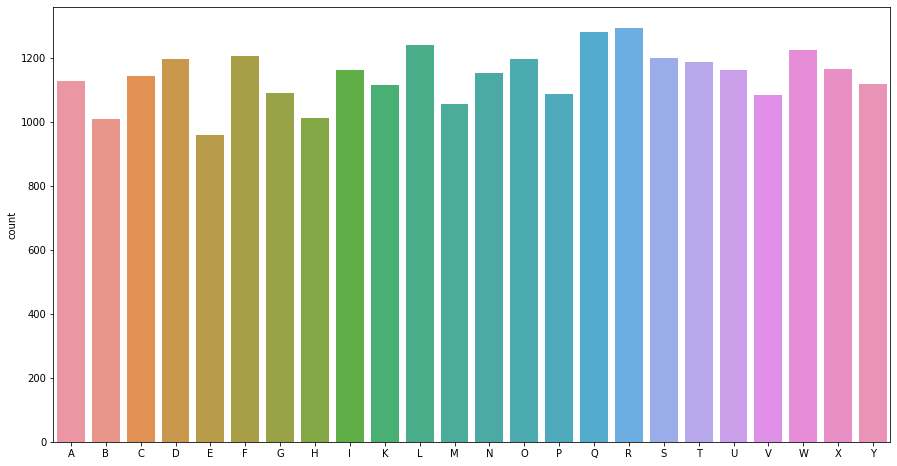

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(x=sorted(target_train))

In [58]:
print(target_train.shape)
print(target_train)

(27455,)
['D' 'G' 'C' ... 'S' 'R' 'X']


In [59]:
label_binrizer = LabelBinarizer()
target_train_binary = label_binrizer.fit_transform(target_train)

In [60]:
print(target_train_binary.shape)
print(target_train_binary)

(27455, 24)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [61]:
target_train

array(['D', 'G', 'C', ..., 'S', 'R', 'X'], dtype='<U1')

In [62]:
image_train = data_train.drop('label', axis = 1)

In [63]:
image_train = image_train.values

In [64]:
print(image_train.shape)
print(image_train)

(27455, 784)
[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]


The shown image as binary alphabet [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
This position is the letter: G


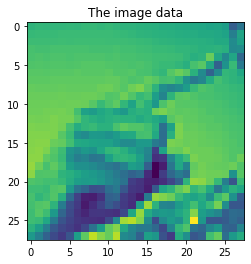

In [65]:
print(f"The shown image as binary alphabet {target_train_binary[1]}")
print(f"This position is the letter: \033[1m{target_train[1]}\033[1m")
plt.imshow(image_train[1].reshape(28,28))
title_obj = plt.title('The image data')

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_train, target_train_binary, test_size = 0.3, random_state = 42)

In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [68]:
batch_size = 128
num_classes = 24
epochs = 20

In [69]:
x_train = x_train / 255
x_test = x_test / 255

In [70]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

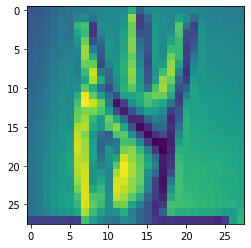

In [71]:
plt.imshow(x_train[0].reshape(28,28))

In [72]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [73]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
model.save("../Models/my_model_2.h5")

In [ ]:
from keras.models import load_model
model = load_model("../Models/my_model_2.h5")

In [ ]:
print(model.summary())

maybe later, have to set an environmental variabel first: <br>
"from keras.utils.vis_utils import plot_model <br>
plot_model(model, show_shapes=True, show_layer_names=True)"

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

### Test Data

In [2]:
data_test = pd.read_csv("../Data/sign_mnist_test.csv")

In [3]:
data_test.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [4]:
target_test_num = data_test["label"].values

In [5]:
target_test = []
for i in target_test_num:
    target_test.append(string.ascii_uppercase[i])    

In [6]:
target_test = np.array(target_test)
target_test

array(['G', 'F', 'K', ..., 'C', 'E', 'C'], dtype='<U1')

In [7]:
np.unique(target_test)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1')

In [9]:
label_binrizer = LabelBinarizer()
y_test_new = label_binrizer.fit_transform(target_test)

In [10]:
y_test_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [11]:
image_test = data_test.drop('label', axis = 1)

In [12]:
image_test = image_test.values

In [13]:
image_test.shape

(7172, 784)

In [14]:
image_test

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]], dtype=int64)

In [15]:
X_test_new = image_test.reshape(image_test.shape[0], 28, 28, 1)

In [16]:
X_test_new.shape

(7172, 28, 28, 1)

In [17]:
X_test_new

array([[[[149],
         [149],
         [150],
         ...,
         [150],
         [150],
         [149]],

        [[150],
         [150],
         [150],
         ...,
         [151],
         [150],
         [151]],

        [[150],
         [151],
         [151],
         ...,
         [151],
         [151],
         [152]],

        ...,

        [[ 69],
         [ 69],
         [ 77],
         ...,
         [116],
         [113],
         [118]],

        [[ 74],
         [ 75],
         [ 76],
         ...,
         [110],
         [116],
         [113]],

        [[ 75],
         [ 74],
         [ 74],
         ...,
         [112],
         [120],
         [107]]],


       [[[126],
         [128],
         [131],
         ...,
         [133],
         [134],
         [132]],

        [[129],
         [132],
         [134],
         ...,
         [136],
         [136],
         [134]],

        [[133],
         [135],
         [138],
         ...,
         [140],
         [

In [18]:
X_test_new = X_test_new/255

In [23]:
from keras.models import load_model
model = load_model("../Models/my_model_new_data.h5")

In [24]:
y_predict = model.predict(X_test_new)

In [25]:
y_predict.shape

(7172, 24)

In [26]:
accuracy_score(y_test_new, y_predict.round())

0.5612102621305075

In [22]:
accuracy_score(y_test_new, y_predict.round())

0.8919408812046848

In [92]:
accuracy_score(y_test_new, y_predict.round())

0.8817624093697713

In [94]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
#        frame = cv2.flip(frame,0)

        # write the flipped frame
        # out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cv2.imshow('wait frame',frame)
cv2.waitKey(10000)
cap.release()
cv2.destroyAllWindows()

In [95]:
frame2 = frame

In [118]:
 #frame = frame2

In [119]:
# Correcting color to gray
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Smoothing images
kernel = np.ones((5,5),np.float32)/30
frame = cv2.filter2D(frame,-1,kernel)

# Correcting sizing for analysis
frame = cv2.resize(frame, (28, 28)) 

In [122]:
np.save('data.npy', frame)

In [ ]:
new_num_arr = np.load('data.npy')

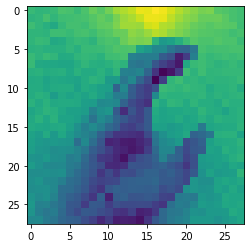

In [121]:
plt.imshow(frame)

In [98]:
frame.shape

(28, 28)

In [99]:
frame = frame.reshape(1, 28, 28, 1)

In [100]:
y_frame = model.predict(frame)

In [101]:
y_frame

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [102]:
for i in range(24):
    if y_frame[0][i] == 1:
        print(np.unique(target_train)[i])

C


In [103]:
y_frame[0][22]

0.0

In [104]:
pip install pypng

  Stored in directory: C:\Users\Onurun\AppData\Local\pip\Cache\wheels\41\6b\ef\0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import png
f = open('ramp.png', 'wb')      # binary mode is important
w = png.Writer(255, 1, greyscale=True)
w.write(f, [range(256)])
f.close()

In [106]:
import png

In [107]:
w = png.Writer(255, 1, greyscale=True)

In [114]:
import Image

ModuleNotFoundError: No module named 'Image'

In [113]:
im = Image.fromarray(image)
im.save('test.png')

NameError: name 'Image' is not defined

In [455]:
target_train[:43]

array(['D', 'G', 'C', 'C', 'N', 'Q', 'I', 'W', 'D', 'D', 'S', 'K', 'Q',
       'W', 'U', 'Q', 'R', 'N', 'N', 'T', 'S', 'V', 'Q', 'X', 'D', 'X',
       'Y', 'S', 'W', 'B', 'B', 'M', 'C', 'G', 'C', 'M', 'X', 'C', 'D',
       'N', 'L', 'P', 'U'], dtype='<U1')

In [456]:
target_train[40]

'L'

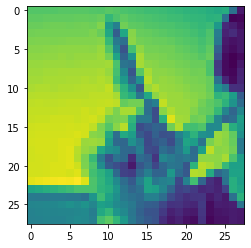

In [457]:
plt.imshow(image_train[40].reshape(28,28))

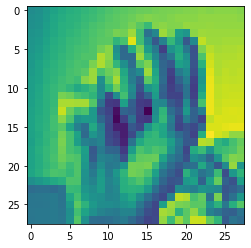

In [161]:
plt.imshow(images[31])

In [148]:
len(list(labels))

27455

In [152]:
list_12 = []
for i in range(27454):
    if labels[i] == 12:
        list_12.append(i)

In [162]:
labels[31]

12

In [153]:
list_12

[31,
 35,
 70,
 100,
 103,
 116,
 142,
 374,
 396,
 405,
 463,
 524,
 529,
 559,
 574,
 586,
 596,
 614,
 657,
 697,
 724,
 732,
 739,
 745,
 769,
 787,
 799,
 809,
 823,
 834,
 920,
 941,
 970,
 996,
 1006,
 1024,
 1045,
 1067,
 1118,
 1137,
 1159,
 1193,
 1207,
 1215,
 1261,
 1362,
 1482,
 1492,
 1503,
 1532,
 1548,
 1553,
 1573,
 1599,
 1603,
 1623,
 1768,
 1801,
 1830,
 1843,
 1862,
 1889,
 1929,
 1933,
 1946,
 1953,
 2003,
 2027,
 2151,
 2166,
 2257,
 2270,
 2289,
 2319,
 2322,
 2332,
 2334,
 2368,
 2372,
 2374,
 2381,
 2404,
 2417,
 2457,
 2476,
 2481,
 2482,
 2491,
 2495,
 2520,
 2560,
 2585,
 2614,
 2633,
 2658,
 2667,
 2701,
 2706,
 2712,
 2757,
 2803,
 2806,
 2859,
 2887,
 2952,
 3009,
 3025,
 3030,
 3063,
 3064,
 3066,
 3130,
 3200,
 3235,
 3306,
 3312,
 3326,
 3330,
 3338,
 3339,
 3342,
 3409,
 3451,
 3464,
 3474,
 3536,
 3568,
 3587,
 3616,
 3664,
 3689,
 3758,
 3764,
 3792,
 3826,
 3872,
 3910,
 3911,
 3920,
 3967,
 4004,
 4006,
 4043,
 4089,
 4098,
 4107,
 4149,
 4240,
 

In [46]:
data_train_re = pd.read_csv("../Data/sign_mnist_train.csv")

In [47]:
data_test_re = pd.read_csv("../Data/sign_mnist_test.csv")

In [ ]:
data_new_train_re = pd.concat([data_train_re, data_test_re])